In [ ]:
#kaggle dataset
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "The_Cancer_data_1500_V2.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "rabieelkharoua/cancer-prediction-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:\n", df.head())

/tmp/ipython-input-979475731.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 100k/100k [00:00<00:00, 18.7MB/s]

First 5 records:
    Age  Gender        BMI  Smoking  GeneticRisk  PhysicalActivity  \
0   58       1  16.085313        0            1          8.146251   
1   71       0  30.828784        0            1          9.361630   
2   48       1  38.785084        0            2          5.135179   
3   34       0  30.040296        0            0          9.502792   
4   62       1  35.479721        0            0          5.356890   

   AlcoholIntake  CancerHistory  Diagnosis  
0       4.148219              1          1  
1       3.519683              0          0  
2       4.728368              0          1  
3       2.044636              0          0  
4       3.309849              0          1  


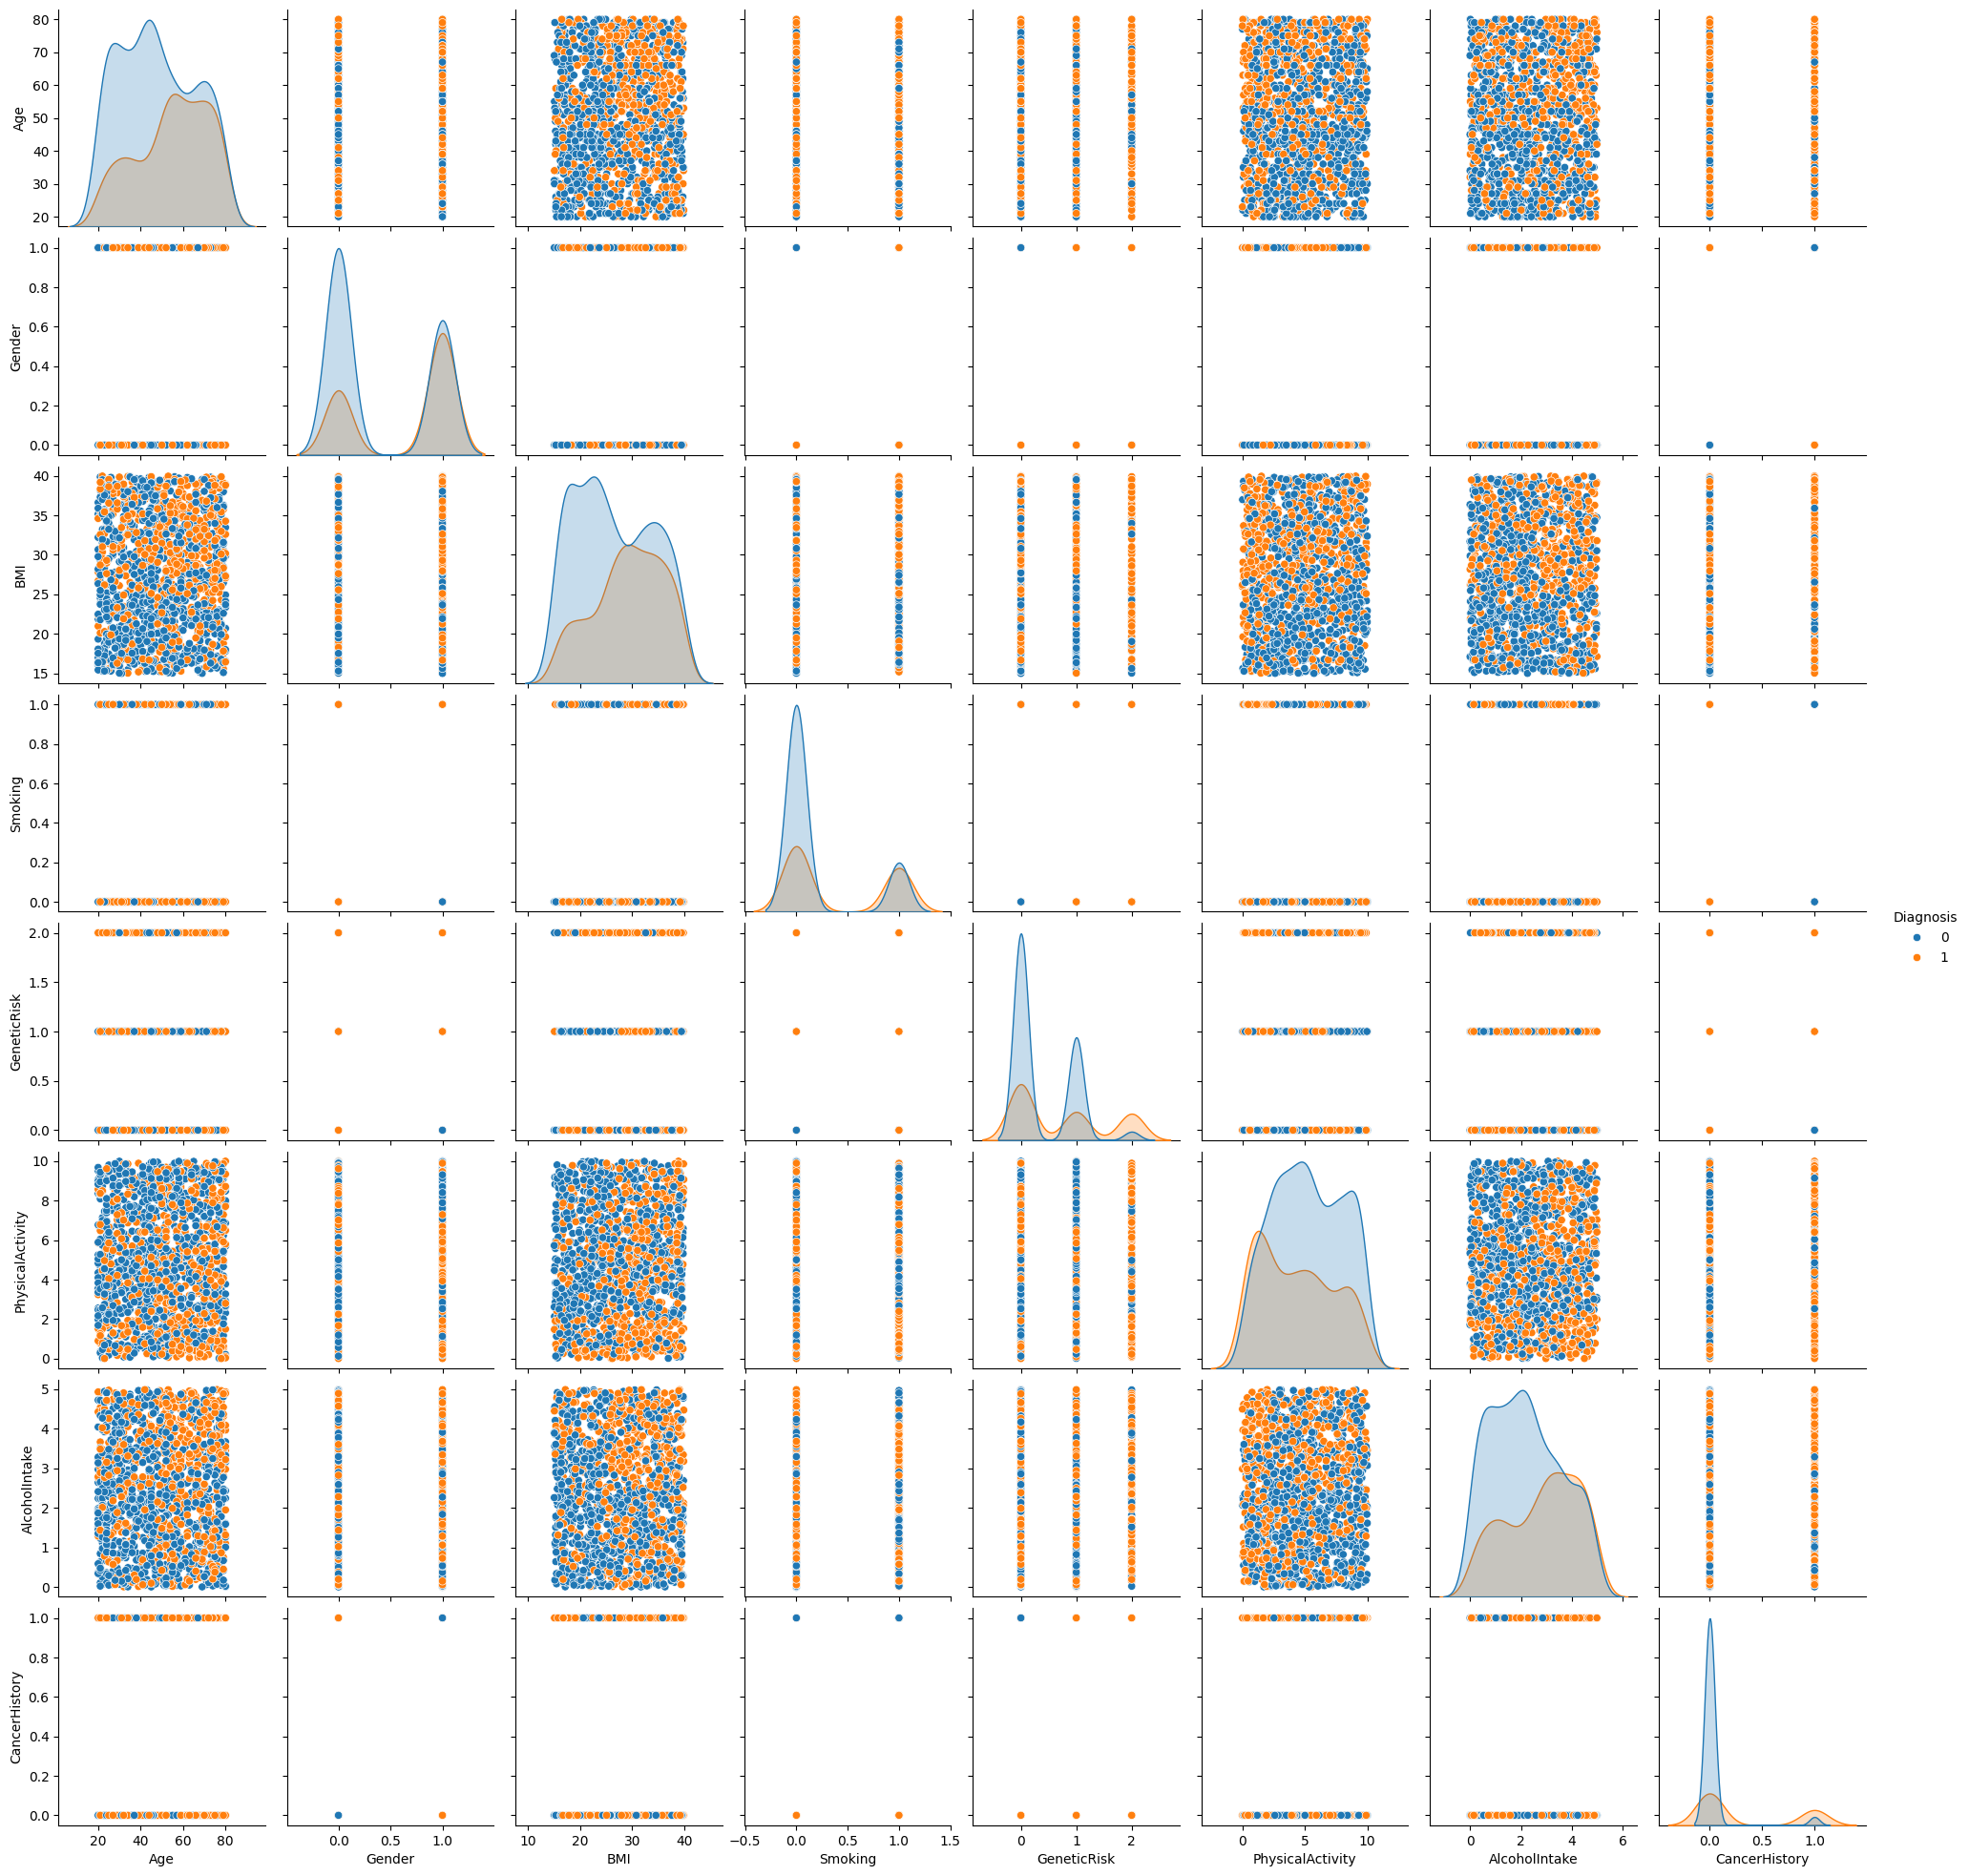

In [ ]:
#pairplot
import seaborn as sns
sns.pairplot(df, hue='Diagnosis')

In [ ]:
#make diagnosis as y and rest as x
y = df['Diagnosis']
df_raw = df.drop(['Diagnosis'], axis=1)

#scaling
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
df = scaler.fit_transform(df)


[[ 0.43549546  1.01884419 -1.58116185 ...  1.1337129   1.21946526
   2.43812314]
 [ 1.17266226 -0.98150435  0.45872244 ...  1.55789869  0.77647404
  -0.41015156]
 [-0.13155592  1.01884419  1.55954393 ...  0.08280367  1.62835335
  -0.41015156]
 ...
 [ 0.71902115  1.01884419  0.70570289 ... -1.54651364 -1.59840354
  -0.41015156]
 [ 0.26538005 -0.98150435 -0.26912183 ...  1.01123176 -0.30436716
   2.43812314]
 [ 0.9458417   1.01884419 -0.5327102  ... -0.82788764  0.30913374
   2.43812314]]


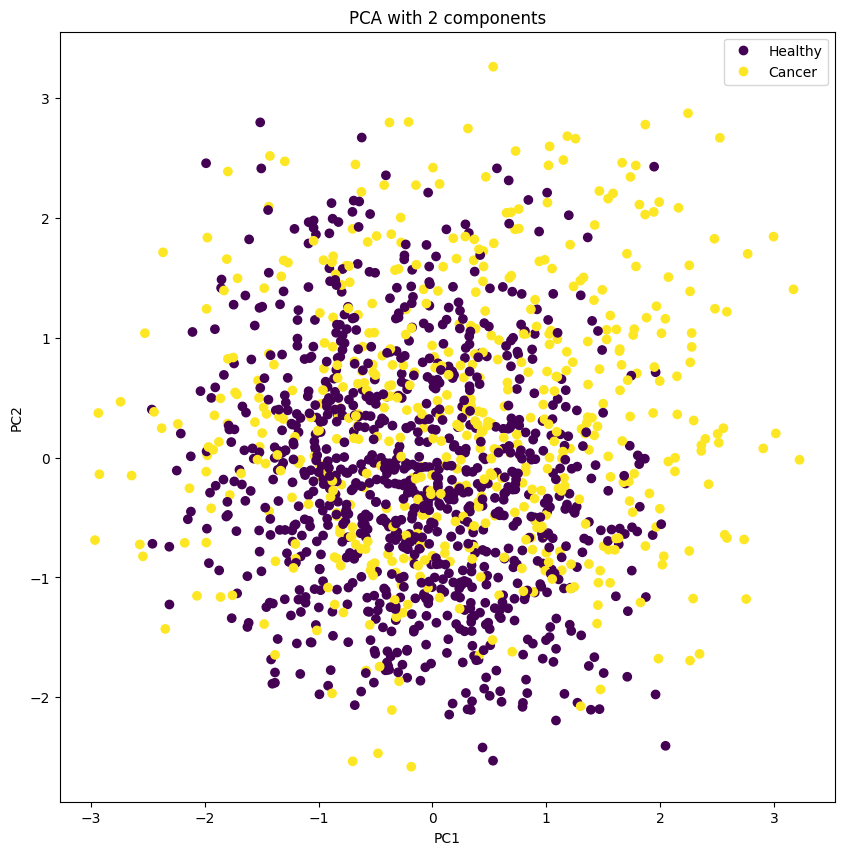

In [ ]:
#PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(df)
plt.figure(figsize=(10,10))
sc = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y)

#turn 0 and 1 to healthy and cancer
plt.legend(handles=sc.legend_elements()[0], labels=['Healthy', 'Cancer'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA with 2 components')
plt.show()

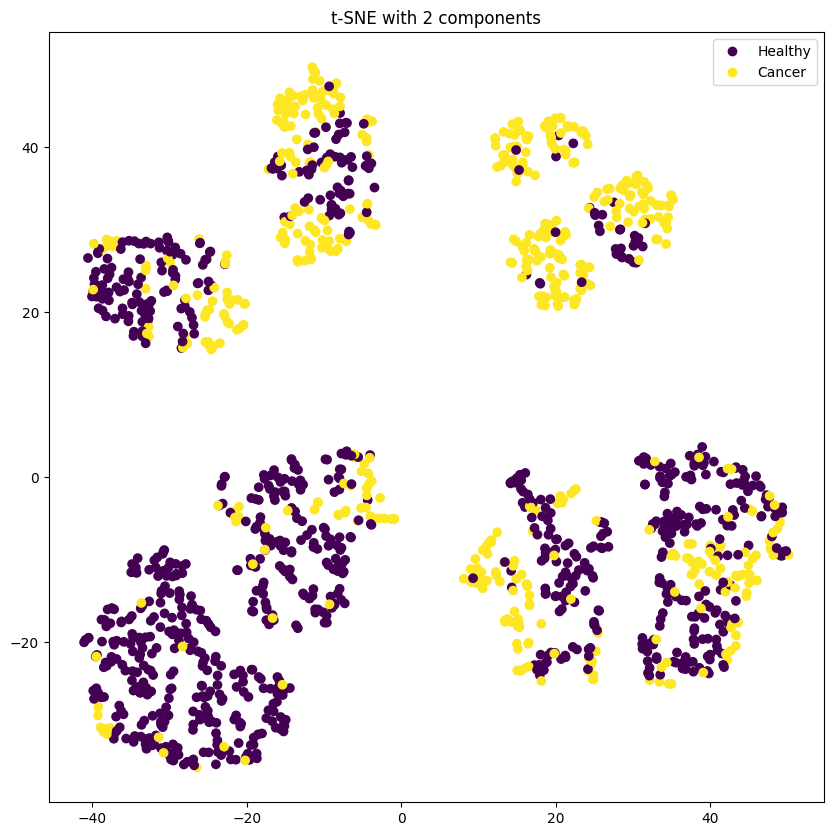

In [ ]:
#tSNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
x_tsne = tsne.fit_transform(df)
plt.figure(figsize=(10,10))
sc = plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y)
plt.legend(handles=sc.legend_elements()[0], labels=['Healthy', 'Cancer'])
plt.title('t-SNE with 2 components')
plt.show()

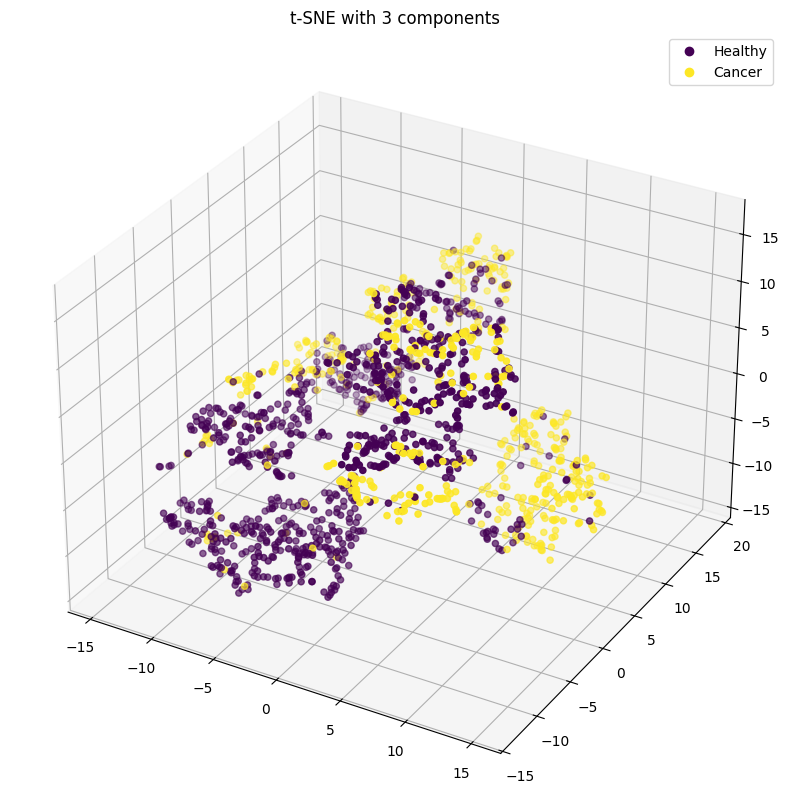

In [ ]:
#3D visualization with 3 components
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
tsne = TSNE(n_components=3, random_state=0)
x_tsne = tsne.fit_transform(df)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x_tsne[:, 0], x_tsne[:, 1], x_tsne[:, 2], c=y)
ax.legend(handles=sc.legend_elements()[0], labels=['Healthy', 'Cancer'])
ax.set_title('t-SNE with 3 components')
plt.show()

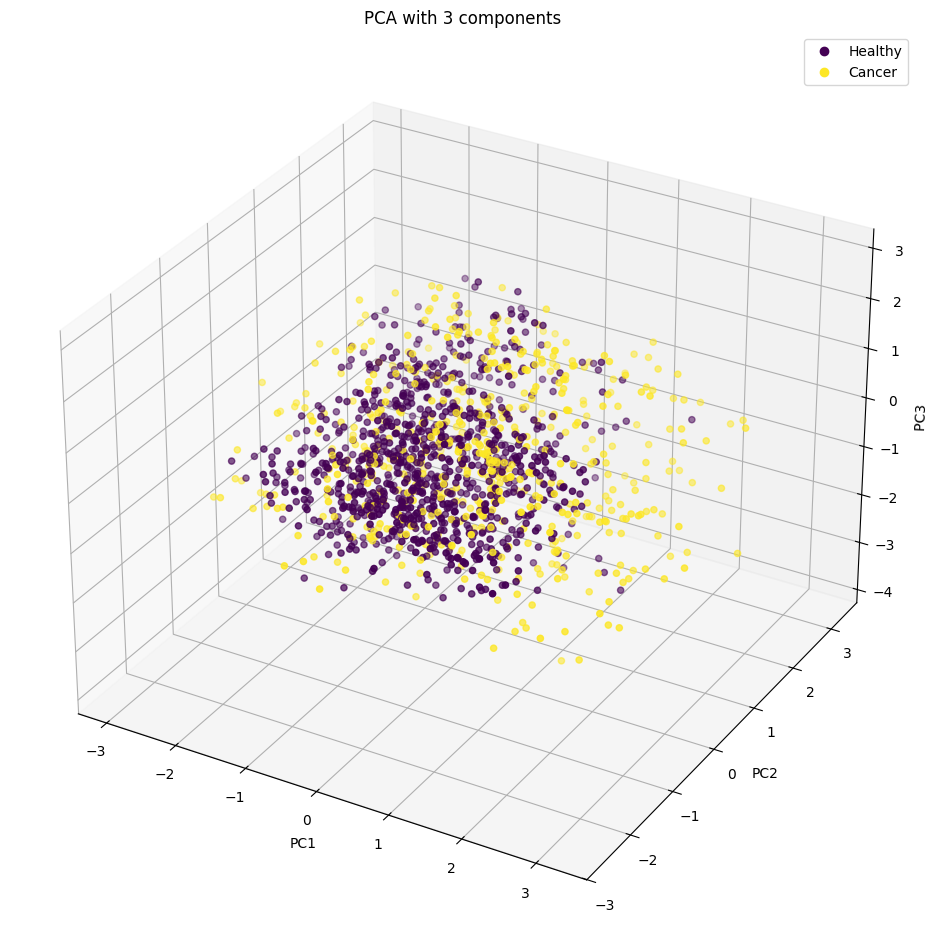

In [ ]:
#3D visualization with 3 components
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)
x_pca = pca.fit_transform(df)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=y)
ax.legend(handles=sc.legend_elements()[0], labels=['Healthy', 'Cancer'])
plt.xlabel('PC1')
plt.ylabel('PC2')
ax.set_zlabel('PC3  ')
ax.set_title('PCA with 3 components')
plt.tight_layout() # Added tight_layout
# You can adjust the plot position here by changing the 'left' parameter:
fig.subplots_adjust(left=0.08)
plt.show()